In [1]:
%load_ext autoreload
%autoreload 2

---------------------------

## Config

In [2]:
import sys

In [3]:
project_dir = '/home/pmonteagudo/workspace/silencing_project'
if project_dir not in sys.path: 
    sys.path.append(project_dir)
from config_analysis import *

In [4]:
from Util import to_log2_tpm
from Util import long_header

<font color='red'> **Attention!** for `H3K9me2` samples It's possible to use other directories than the default (e.g. `ChIP/h3k9me2`) </font>

In [5]:
h3k9me2_analysis=False
#h3k9me2_analysis=True

In [6]:
h3k9me2_dir = 'h3k9me2' # use longest 3 mRNA genes
h3k9me2_dir = 'strict_mean_h3k9me2'
#h3k9me2_dir = 'strict_mean_h3k9me2_v1'
h3k9me2_dir = 'strict_median_h3k9me2'
#h3k9me2_dir = 'strict_q98_h3k9me2'
#h3k9me2_dir = 'strict_q95_h3k9me2'
#h3k9me2_dir = 'wo_ip_subtraction_h3k9me2'

In [7]:
if not h3k9me2_analysis:
    seq_assay = 'S2-ChIP'
else:
    seq_assay = "H3K9me2"
seq_assay

'S2-ChIP'

- Result **directories**

In [8]:
#chip_dir = os.path.join(project_data_dir, 'results/xp_data/ChIP')
chip_dir = chip_dir
if h3k9me2_analysis:
    chip_dir = os.path.join(chip_dir, h3k9me2_dir)
chip_dir

'/gcm-lfs1/pablo/data/rna_silencing/results/xp_data/ChIP'

-------------

# Create Boxplots: **ChIP Expression (ChIPXP)**

This mean we analyze the data for **ChIP-seq** related samples:
- Pol II S2-ChIP **(S2 Pol II Occupancy)**
- Pol II S5-ChIP **(S5 Pol II Occupancy)**
- H3K9me2 ChIP **(H3K9me2 Occupancy)**


This Notebook is used to generate the following **Box Plots**:
- **Figure-S3** <font color='red'> **(Not included in manuscript so far)** </font>
    - Mutant group 1 (S2-ChIP) - <del>**Figure-S3-E**</del>  <font color='red'> **Figure-S6-E** </font>
    - Mutant group 2 (S2-ChIP) - <del>**Figure-S3-F**</del>  <font color='red'> **Figure-S6-F** </font>


### <font color='blue'> **Attention!** In this Notebook we are not analyzing **ratios** but **absolute expression** </font>

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [10]:
#from Viz import prepare_4cat_data, multi_4cat_box_plot ## use viz_strands instead!!
from viz_strands import prepare_4cat_data, multi_4cat_box_plot, my_multi_4cat_box_plot ## 4-category

-------------

- Define mutant grouping: **group 1**

In [11]:
# data and labels - new version
if not h3k9me2_analysis:
    samples1 = ['WT', '80', '638', '301', '324', '491', '302', '504', '530']
    x_labels1 = ['wt', 'clr4Δ', 'ago1Δ', 'swi6Δ', 'chp2Δ', 'mit1Δ' ,'clr3Δ', 'rrp6Δ', 'exo2Δ']
else:
    samples1 = ['WT', '638', '301', '324', '491', '302', '504', '530'] # remove missing mutant 'clr4Δ' (80)
    x_labels1 = ['wt', 'ago1Δ', 'swi6Δ', 'chp2Δ', 'mit1Δ' ,'clr3Δ', 'rrp6Δ', 'exo2Δ']
    
#     samples1 = ['WT', '301', '324', '491', '302', '504', '530'] # remove missing mutants 'ago1Δ' (638) and 'clr4Δ' (80)
#     x_labels1 = ['wt', 'swi6Δ', 'chp2Δ', 'mit1Δ' ,'clr3Δ', 'rrp6Δ', 'exo2Δ']

- Define mutant grouping: **group 2**

In [12]:
samples2 = ['WT', '504', '530', '510']
x_labels2 = ['wt', 'rrp6Δ', 'exo2Δ', 'caf1Δ']

- Define mutant grouping: **group 3**

In [13]:
samples3 = ['WT', '510', '544', '1022']

In [14]:
x_labels3 = ['wt', 'caf1Δ', 'ccr4Δ', 'mot2Δ']

- Define mutant grouping: **group 4**

In [15]:
samples4 = ['WT', '510', '544', '1022', '1168']

In [16]:
x_labels4 = ['wt', 'caf1Δ', 'ccr4Δ', 'mot2Δ', 'caf1*ccr4*']

-------------

## Import and prepare **Data**: Pol II ChIP

-------------

- Import **ChIP** merged **gene expression Matrix** per Mutant type: `chip_merged_tpm.csv`

In [17]:
chip_file = os.path.join(chip_dir, 'chip_merged_tpm.csv')
#chip_file = os.path.join(chip_dir, 'chip_merged_filtered_tpm.csv')
chip_file

'/gcm-lfs1/pablo/data/rna_silencing/results/xp_data/ChIP/chip_merged_tpm.csv'

In [18]:
df = pd.read_csv(chip_file, sep='\t')
df.head()

,gene_id,gene_name,length,type,category,bio_type,1022_S2-ChIP,1168_S2-ChIP,301_S2-ChIP,302_S2-ChIP,...,504_S2-ChIP,510_S2-ChIP,523_S2-ChIP,530_S2-ChIP,544_S2-ChIP,638_S2-ChIP,80_S2-ChIP,80_S5-ChIP,WT_S2-ChIP,WT_S5-ChIP
0,FP565355_region_1..2120,NaN,2120,region,repeat,region,36.353199,31.604013,25.447595,34.155106,...,82.344549,22.183831,131.192765,75.910257,8.783881,26.188978,20.314666,17.282842,53.476467,14.386670
1,FP565355_region_15417..15473,NaN,57,region,repeat,region,32.989946,0.000000,101.717017,55.581202,...,35.620283,25.716713,30.158095,112.748997,9.204962,0.000000,0.000000,0.000000,207.093084,0.000000
2,FP565355_region_15474..15608,NaN,135,region,repeat,region,55.543018,35.786011,42.055579,103.330550,...,284.326357,53.698150,259.546526,177.695904,47.749498,100.410479,33.232083,35.399402,53.214594,55.465929
3,FP565355_region_15609..16735,NaN,1127,region,repeat,region,57.460638,10.993232,40.619884,31.836483,...,55.698312,29.545178,112.472071,114.430437,23.119050,31.980414,44.331171,52.151483,62.637044,22.864137
4,FP565355_region_16736..16794,NaN,59,region,repeat,region,105.639842,26.961737,21.862377,54.908906,...,44.786774,49.165672,240.632152,150.771303,115.088074,162.738097,90.572514,137.515068,51.058611,230.700837


In [19]:
df.shape

(7021, 22)

- Get **sample columns** for filtering `NA`s properly:

In [20]:
sample_cols = [ss for ss in df.columns.tolist() if ss not in long_header]
len(sample_cols)
#sample_cols

16

#### <font color='red'> Deal with **NAs**: *Drop* or *fill with zeros?* </font>
- <font color='red'> `NaN's` originated from zero counts: **fill with zeros** </font>
- <font color='red'> In `chip_merged_tpm.csv`, it should already have been taken care of! </font> 

In [21]:
# (NOT USED)
# => NAs originated from zero counts: fill with zeros
#df = df.fillna(0) # undesired off-target effects to other columns (e.g. `gene_name`)
#df = df.fillna({kk:0 for kk in sample_cols})

# (NOT USED) drop row (axis - 0) if it finds ANY `na`, becareful when adding new columns!
#df = df.dropna(subset = sample_cols) 
#df = df.dropna(0)

In [22]:
# no surprises!
# => there should not be NAs in sample columns (with counts)
assert not df[sample_cols].isnull().values.any()

- **Log-transform** and filter for **Heterochromatic** and **Protein coding** (mRNA) genes

#### <font color='red'> **Attention!** Parastou used **log(x)** instead of **log(1+x)** </font>

In [23]:
# if using log(x) should remove zeros
df = df[~(np.isclose(df[sample_cols], 0.)).any(axis=1)]

# log transformed counts will be used to visualize boxplots
# => compute log(1+x) to avoid issues with zero counts
#df = to_log2_tpm(df, shift=0)
df = to_log2_tpm(df, gene_id_col='gene_id') # default shift=1
#df = to_log2_tpm(df, gene_id_col='gene_id', shift=0) # parastou used this, default shift=1

# Keep only Heterochromatic genes and protein coding genes
df = df[(df['category'] == 'repeat') | (df['category'] == 'gene')]
#df = df[(df['bio_type'] == 'mRNA') | (df['category'] == 'repeat')]
    
if h3k9me2_analysis:
    # Keep only Heterochromatic genes
    df = df[df['category'] != 'gene']
    
df.head()

,gene_id,gene_name,length,type,category,bio_type,1022_S2-ChIP,1168_S2-ChIP,301_S2-ChIP,302_S2-ChIP,...,504_S2-ChIP,510_S2-ChIP,523_S2-ChIP,530_S2-ChIP,544_S2-ChIP,638_S2-ChIP,80_S2-ChIP,80_S5-ChIP,WT_S2-ChIP,WT_S5-ChIP
0,FP565355_region_1..2120,NaN,2120,region,repeat,region,5.223160,5.026978,4.725065,5.135662,...,6.381016,4.535047,7.046499,6.265104,3.290407,4.764950,4.413775,4.192418,5.767561,3.943609
2,FP565355_region_15474..15608,NaN,135,region,repeat,region,5.821277,5.201085,5.428128,6.705018,...,8.156469,5.773420,8.025397,7.481363,5.607315,6.664063,5.097277,5.185843,5.760609,5.819309
3,FP565355_region_15609..16735,NaN,1127,region,repeat,region,5.869394,3.584149,5.379201,5.037228,...,5.825234,4.932873,6.826193,6.850880,4.592101,5.043538,5.502432,5.732038,5.991795,4.576772
4,FP565355_region_16736..16794,NaN,59,region,repeat,region,6.736603,4.805382,4.514904,5.805006,...,5.516859,5.648629,7.916669,7.245755,6.859076,7.355246,6.516843,7.113899,5.702065,7.856119
5,FP565355_region_18009..20128,NaN,2120,region,repeat,region,5.245417,5.158836,4.742341,5.101930,...,6.366428,4.542269,7.065160,6.280079,3.255801,4.754657,4.405821,4.184826,5.810886,4.023494


In [24]:
df.shape

(6398, 22)

In [25]:
#df[df['gene_id'].isin(non_degraded)]

In [26]:
#df

----

# Create Boxplots: **S2-ChIP** (Pol II Occupancy)

----

## Mutant group 1 - <del>**Figure-S3-E**</del>  <font color='red'> **Figure-S6-E** </font>

- **Supplemental Figure S3**:  
    - **(C + D)** pA RNA-seq results (steady state RNA) shown as box plot for individual mutants affecting
    - **(C)** heterochromatin formation. Average of at least two independent samples is shown.

In [27]:
#fig_dir = os.path.join(plots_dir, 'Figure-S3')
fig_dir = os.path.join(plots_dir, 'Figure-S6')

if h3k9me2_analysis:
    fig_dir = os.path.join(fig_dir, h3k9me2_dir)
    
if not os.path.isdir(fig_dir):    
    !mkdir -p $fig_dir

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure-S6/Figure-S6-E.png


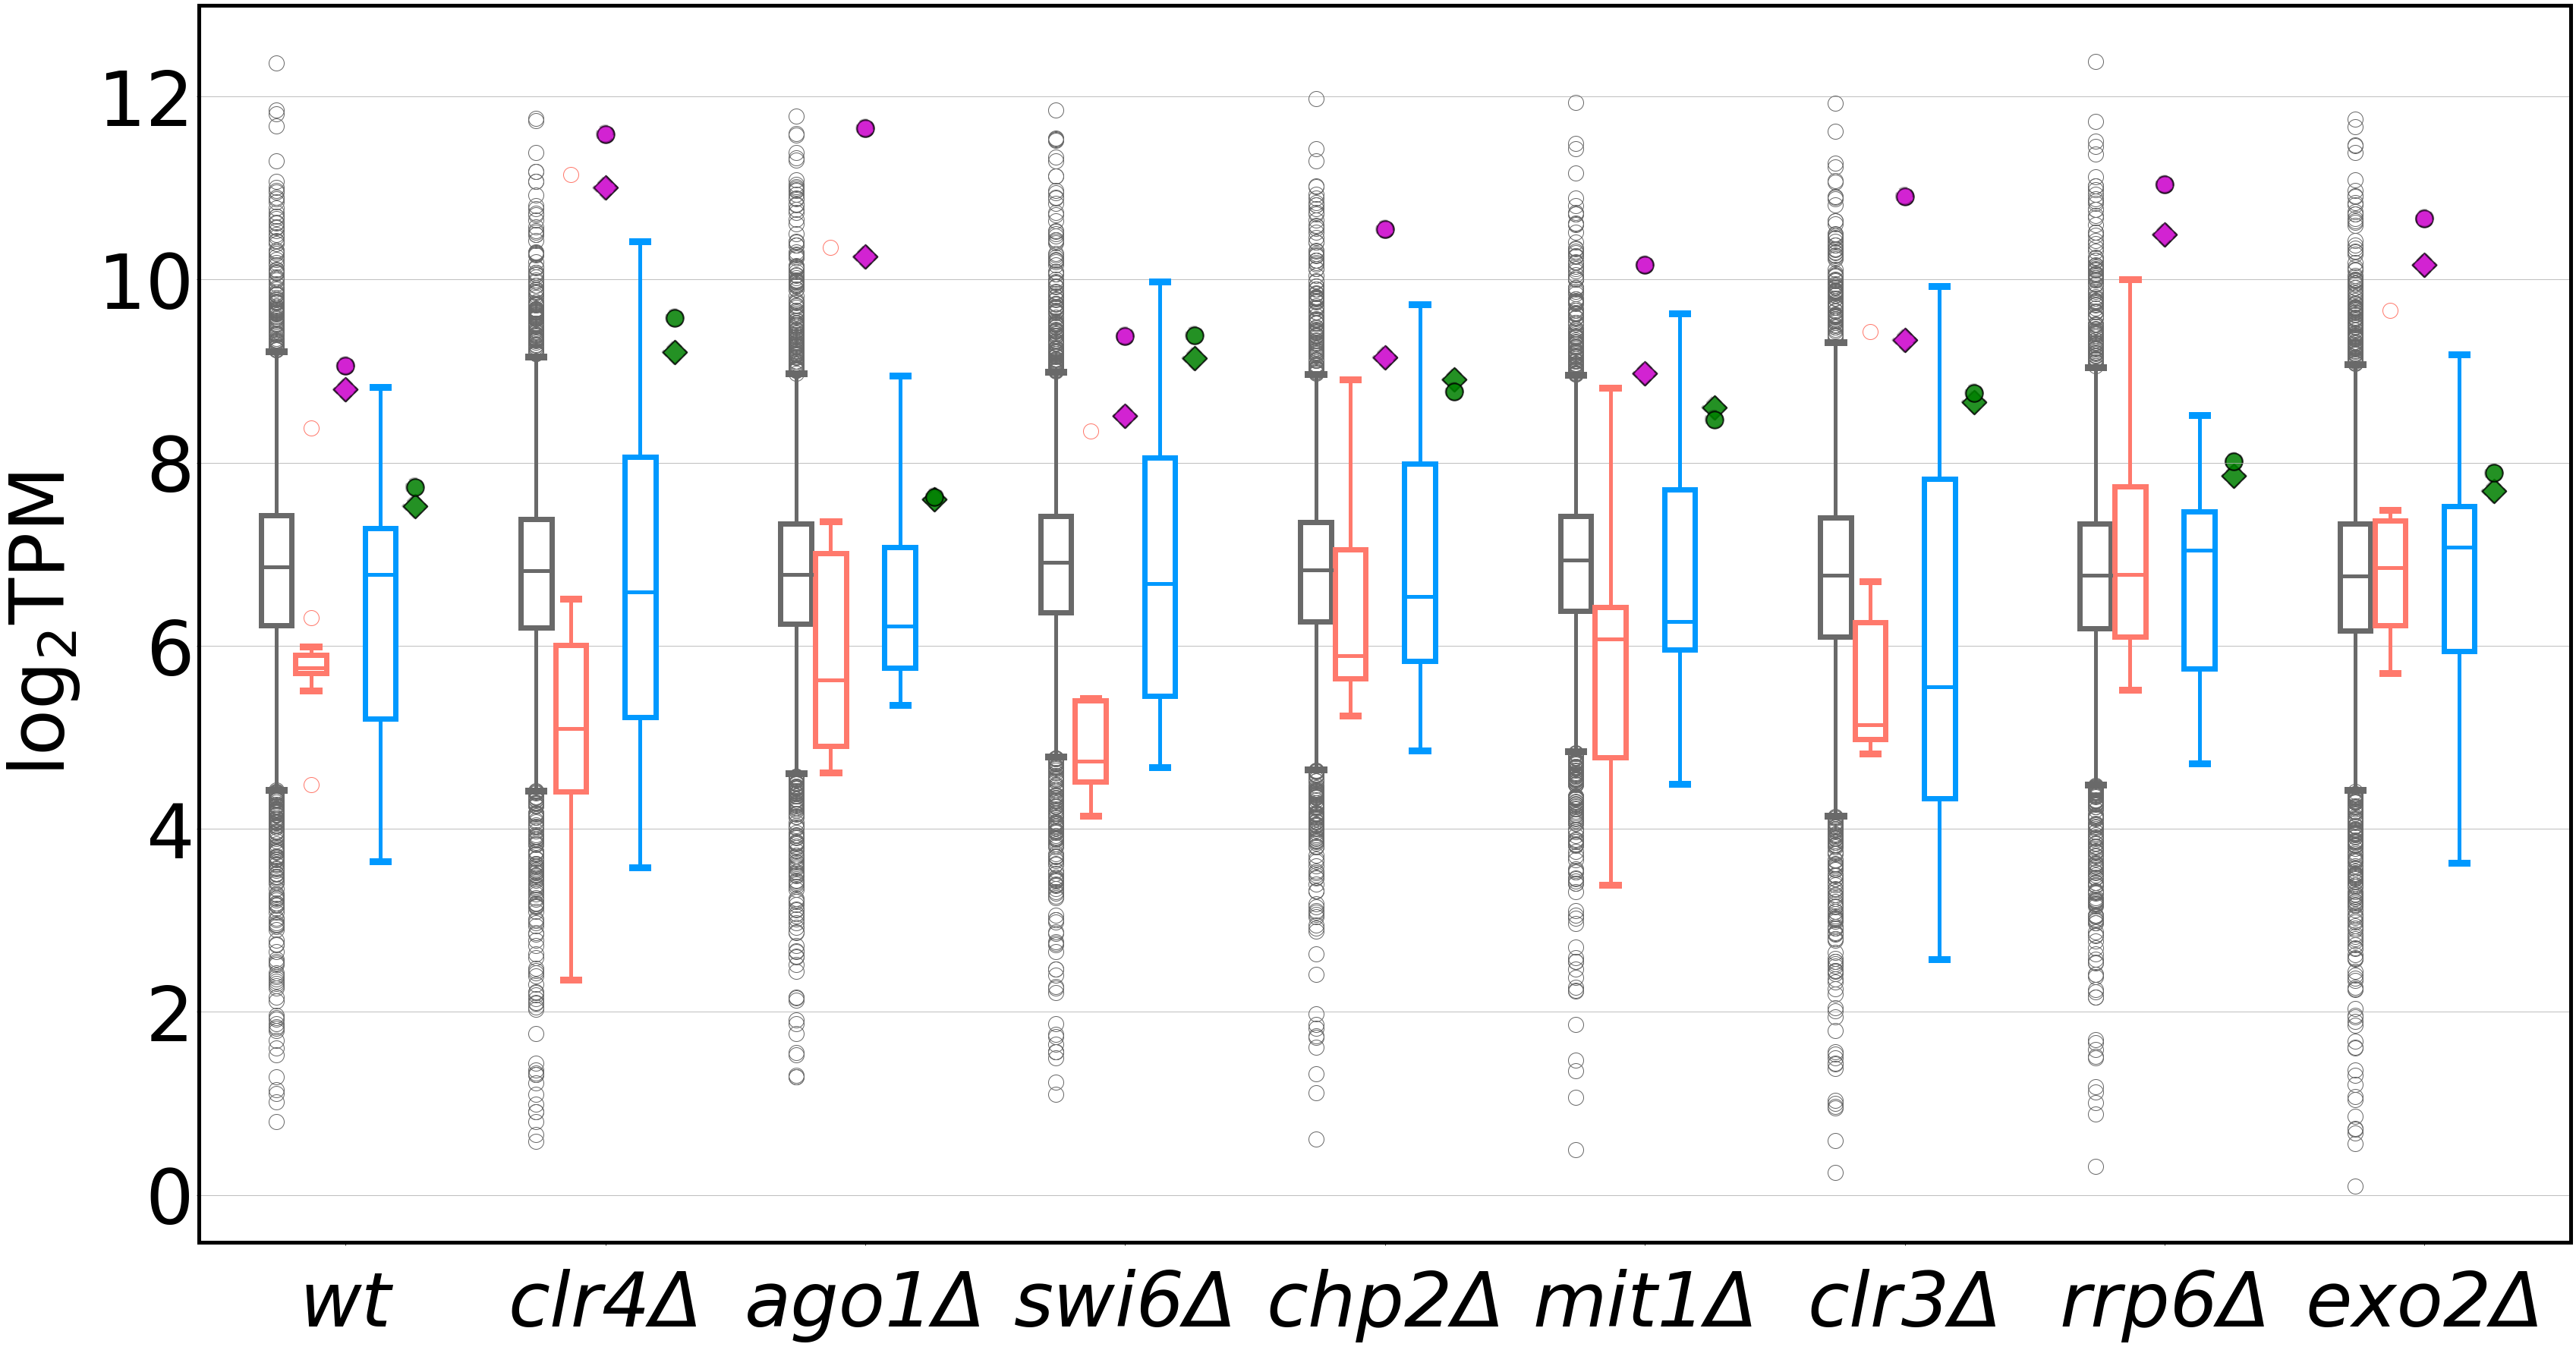

In [28]:
# data and labels
samples = [i + '_' + seq_assay for i in samples1]
#data = prepare_4cat_data(df, samples)

# path and plot
out_path = os.path.join(plots_dir, 'Figure-S3-E.png')
#out_path = os.path.join(fig_dir, 'Figure-S3-E.png')
out_path = os.path.join(fig_dir, 'Figure-S6-E.png')
print(out_path)

#multi_4cat_box_plot(data, samples,
my_multi_4cat_box_plot(
    df, samples, 
    x_labels1,
    out_path, 
    figsize=(56, 30), 
    dist=6, 
    y_label='$\mathrm{log_2TPM}$',
    #y_lim=(-4, 14),
    y_lim=(None, None), 
    widths=.8, 
    xlable_size=100, ylable_size=100,
    annotate=annotate_plots,
    include_mat_locus_vis = include_mat_locus_vis
)

In [29]:
# import seaborn as sns
# ax = sns.displot(df, x="491_H3K9me2", hue="category", stat="probability")

----

## Mutant group 2 - <del>**Figure-S3-F**</del>  <font color='red'> **Figure-S6-F** </font>

- **Supplemental Figure S3**:  
    - **(C + D)** pA RNA-seq results (steady state RNA) shown as box plot for individual mutants affecting
    - **(D)** RNA degradation. Average of at least two independent samples is shown.

In [30]:
#fig_dir = os.path.join(plots_dir, 'Figure-S3')
fig_dir = os.path.join(plots_dir, 'Figure-S6')

if h3k9me2_analysis:
    fig_dir = os.path.join(fig_dir, h3k9me2_dir)

if not os.path.isdir(fig_dir):    
    !mkdir -p $fig_dir

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure-S6/Figure-S6-F.png


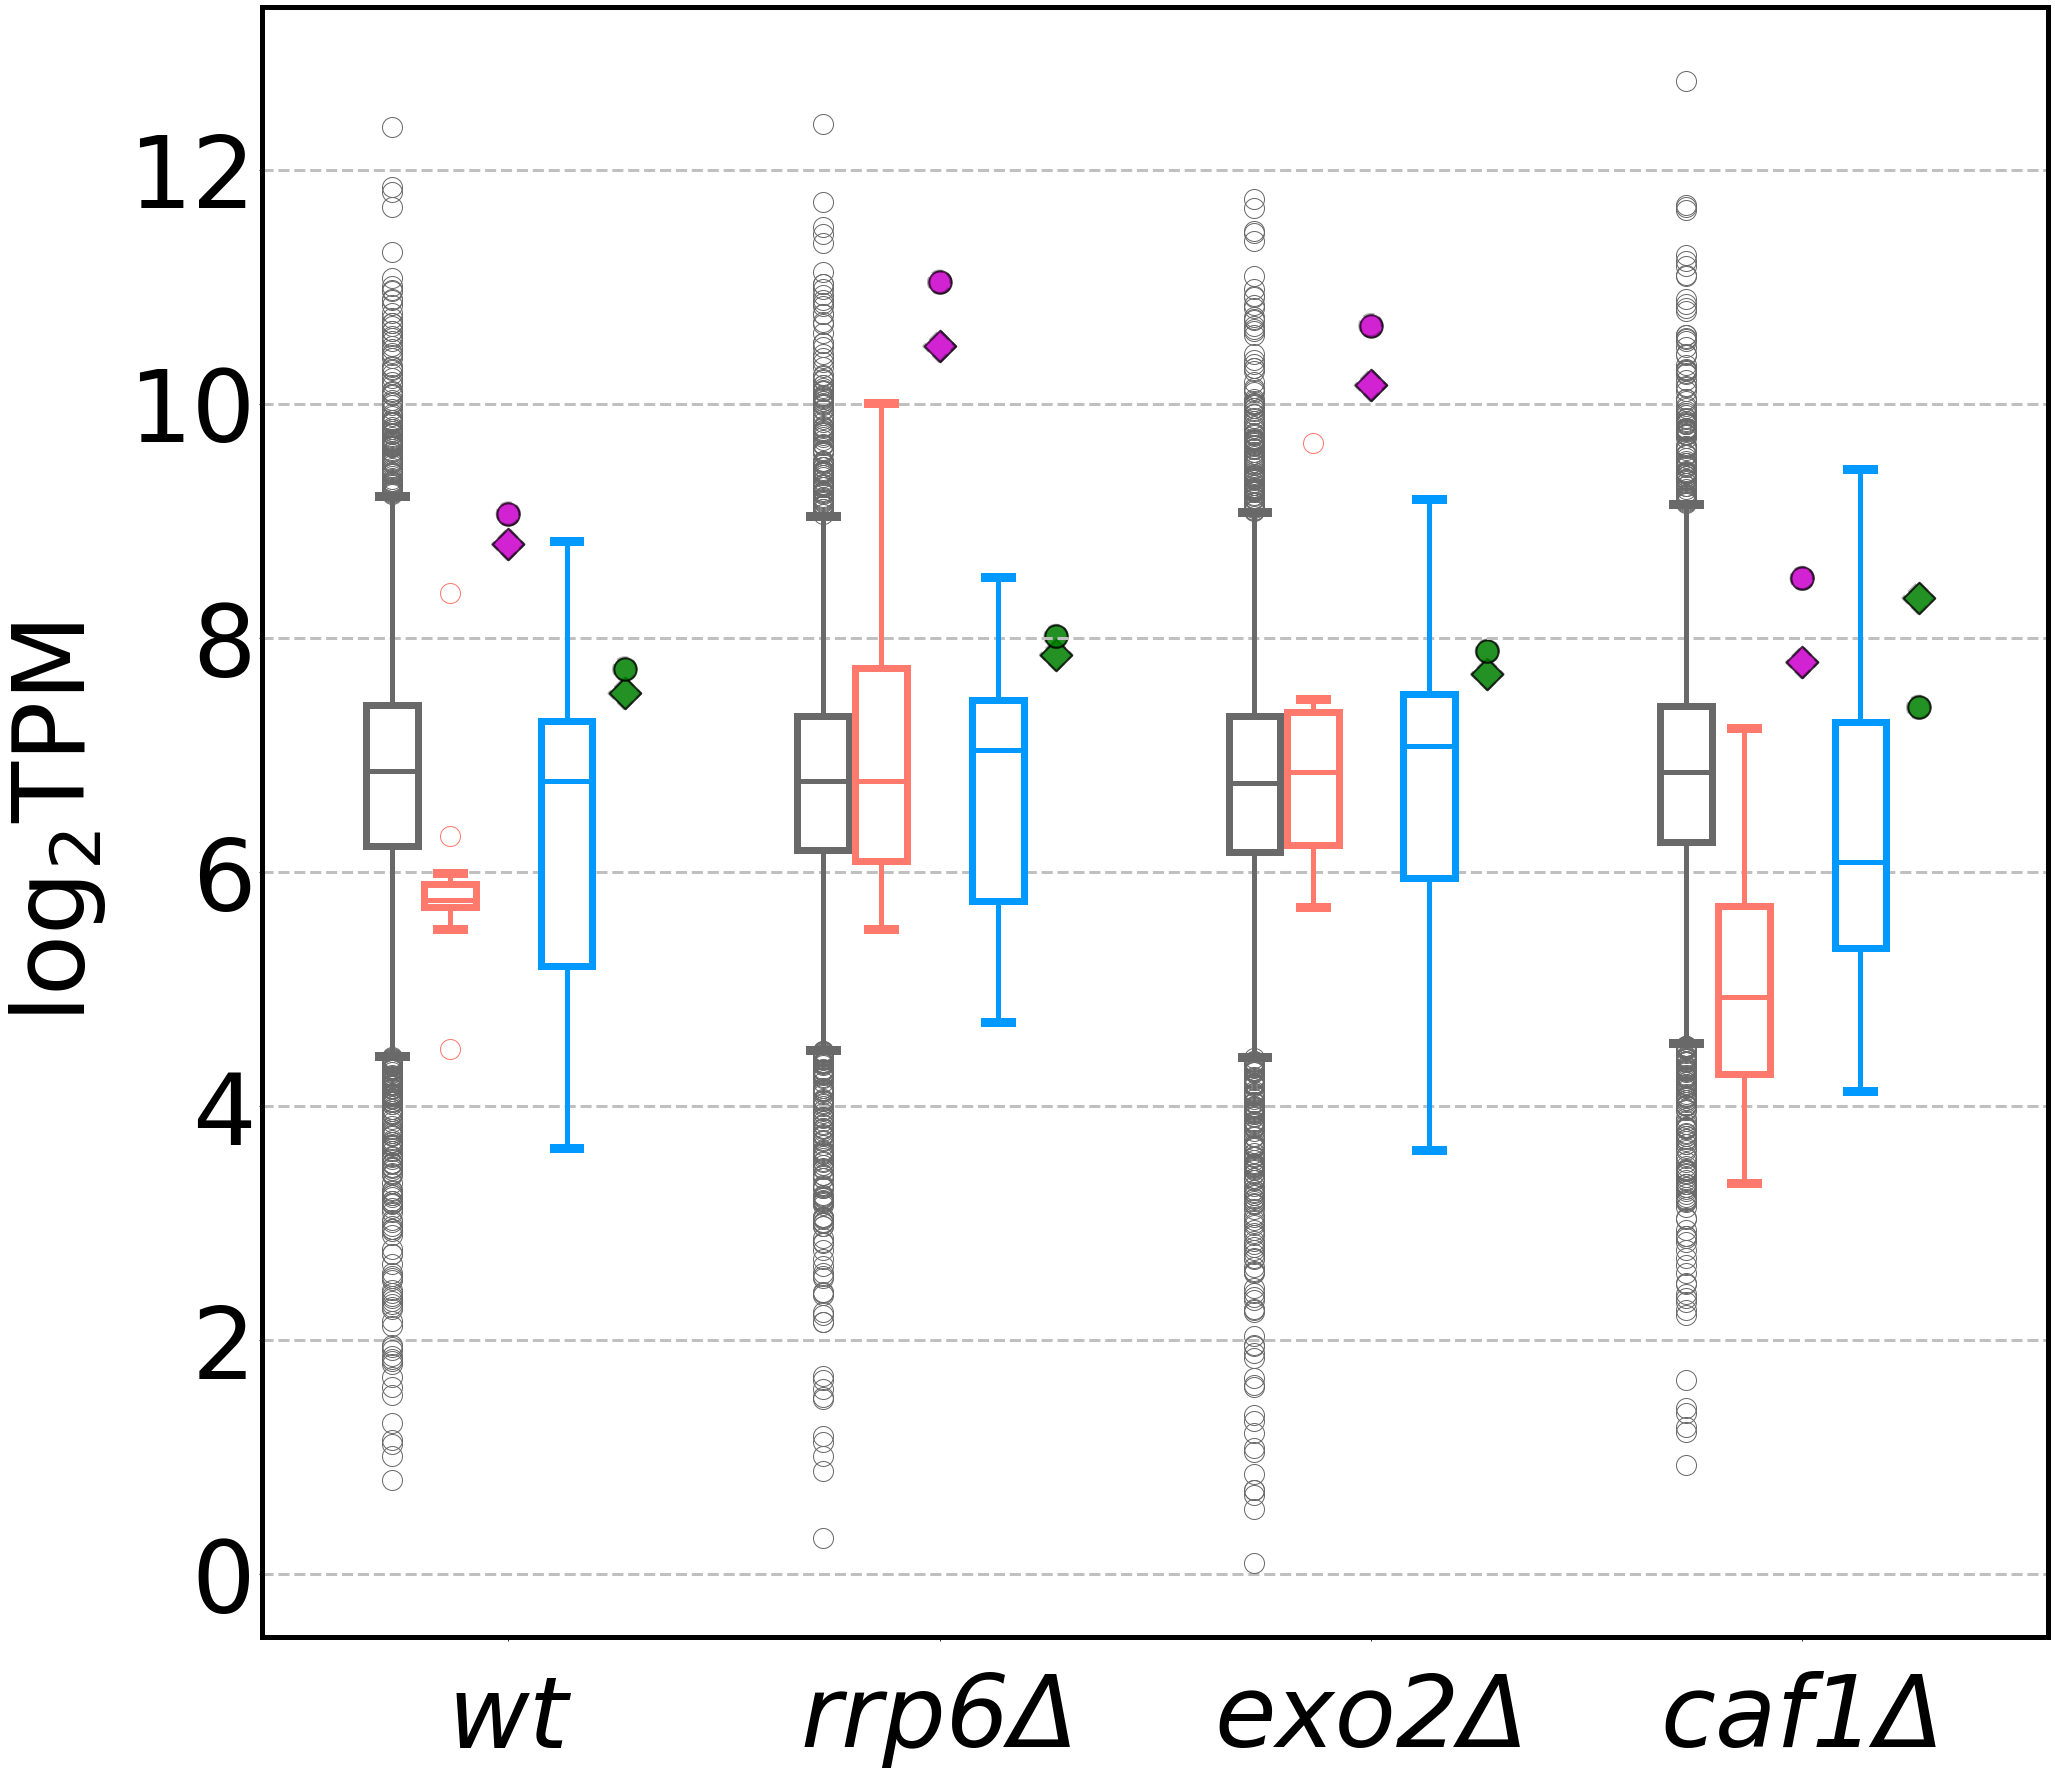

In [31]:
# data and labels
samples = [i + '_' + seq_assay for i in samples2]
#data = prepare_4cat_data(df, samples)

# path and plot
out_path = os.path.join(plots_dir, 'Figure-S3-F.png')
#out_path = os.path.join(fig_dir, 'Figure-S3-F.png')
out_path = os.path.join(fig_dir, 'Figure-S6-F.png')
print(out_path)

#multi_4cat_box_plot(data, samples,
my_multi_4cat_box_plot(
    df, samples, 
    x_labels2,
    out_path, 
    figsize=(32, 30), 
    dist=5,
    y_label='$\mathrm{log_2TPM}$',
    #y_lim=(-5, 14),  
    y_lim=(None, None),
    widths=.8, 
    xlable_size=100, ylable_size=100,
    annotate=annotate_plots,
    include_mat_locus_vis = include_mat_locus_vis
)

----

## Mutant group 3 - **Figure-S3-F-extra-ccr4-not-1**

- **Supplemental Figure S3**:  
    - **(C + D)** pA RNA-seq results (steady state RNA) shown as box plot for individual mutants affecting
    - **(D)** RNA degradation. Average of at least two independent samples is shown.

In [32]:
#fig_dir = os.path.join(plots_dir, 'Figure-S3')
fig_dir = os.path.join(plots_dir, 'Figure-S6')

if not os.path.isdir(fig_dir):    
    !mkdir -p $fig_dir

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure-S6/Figure-S6-F-extra-ccr4-not-1.png


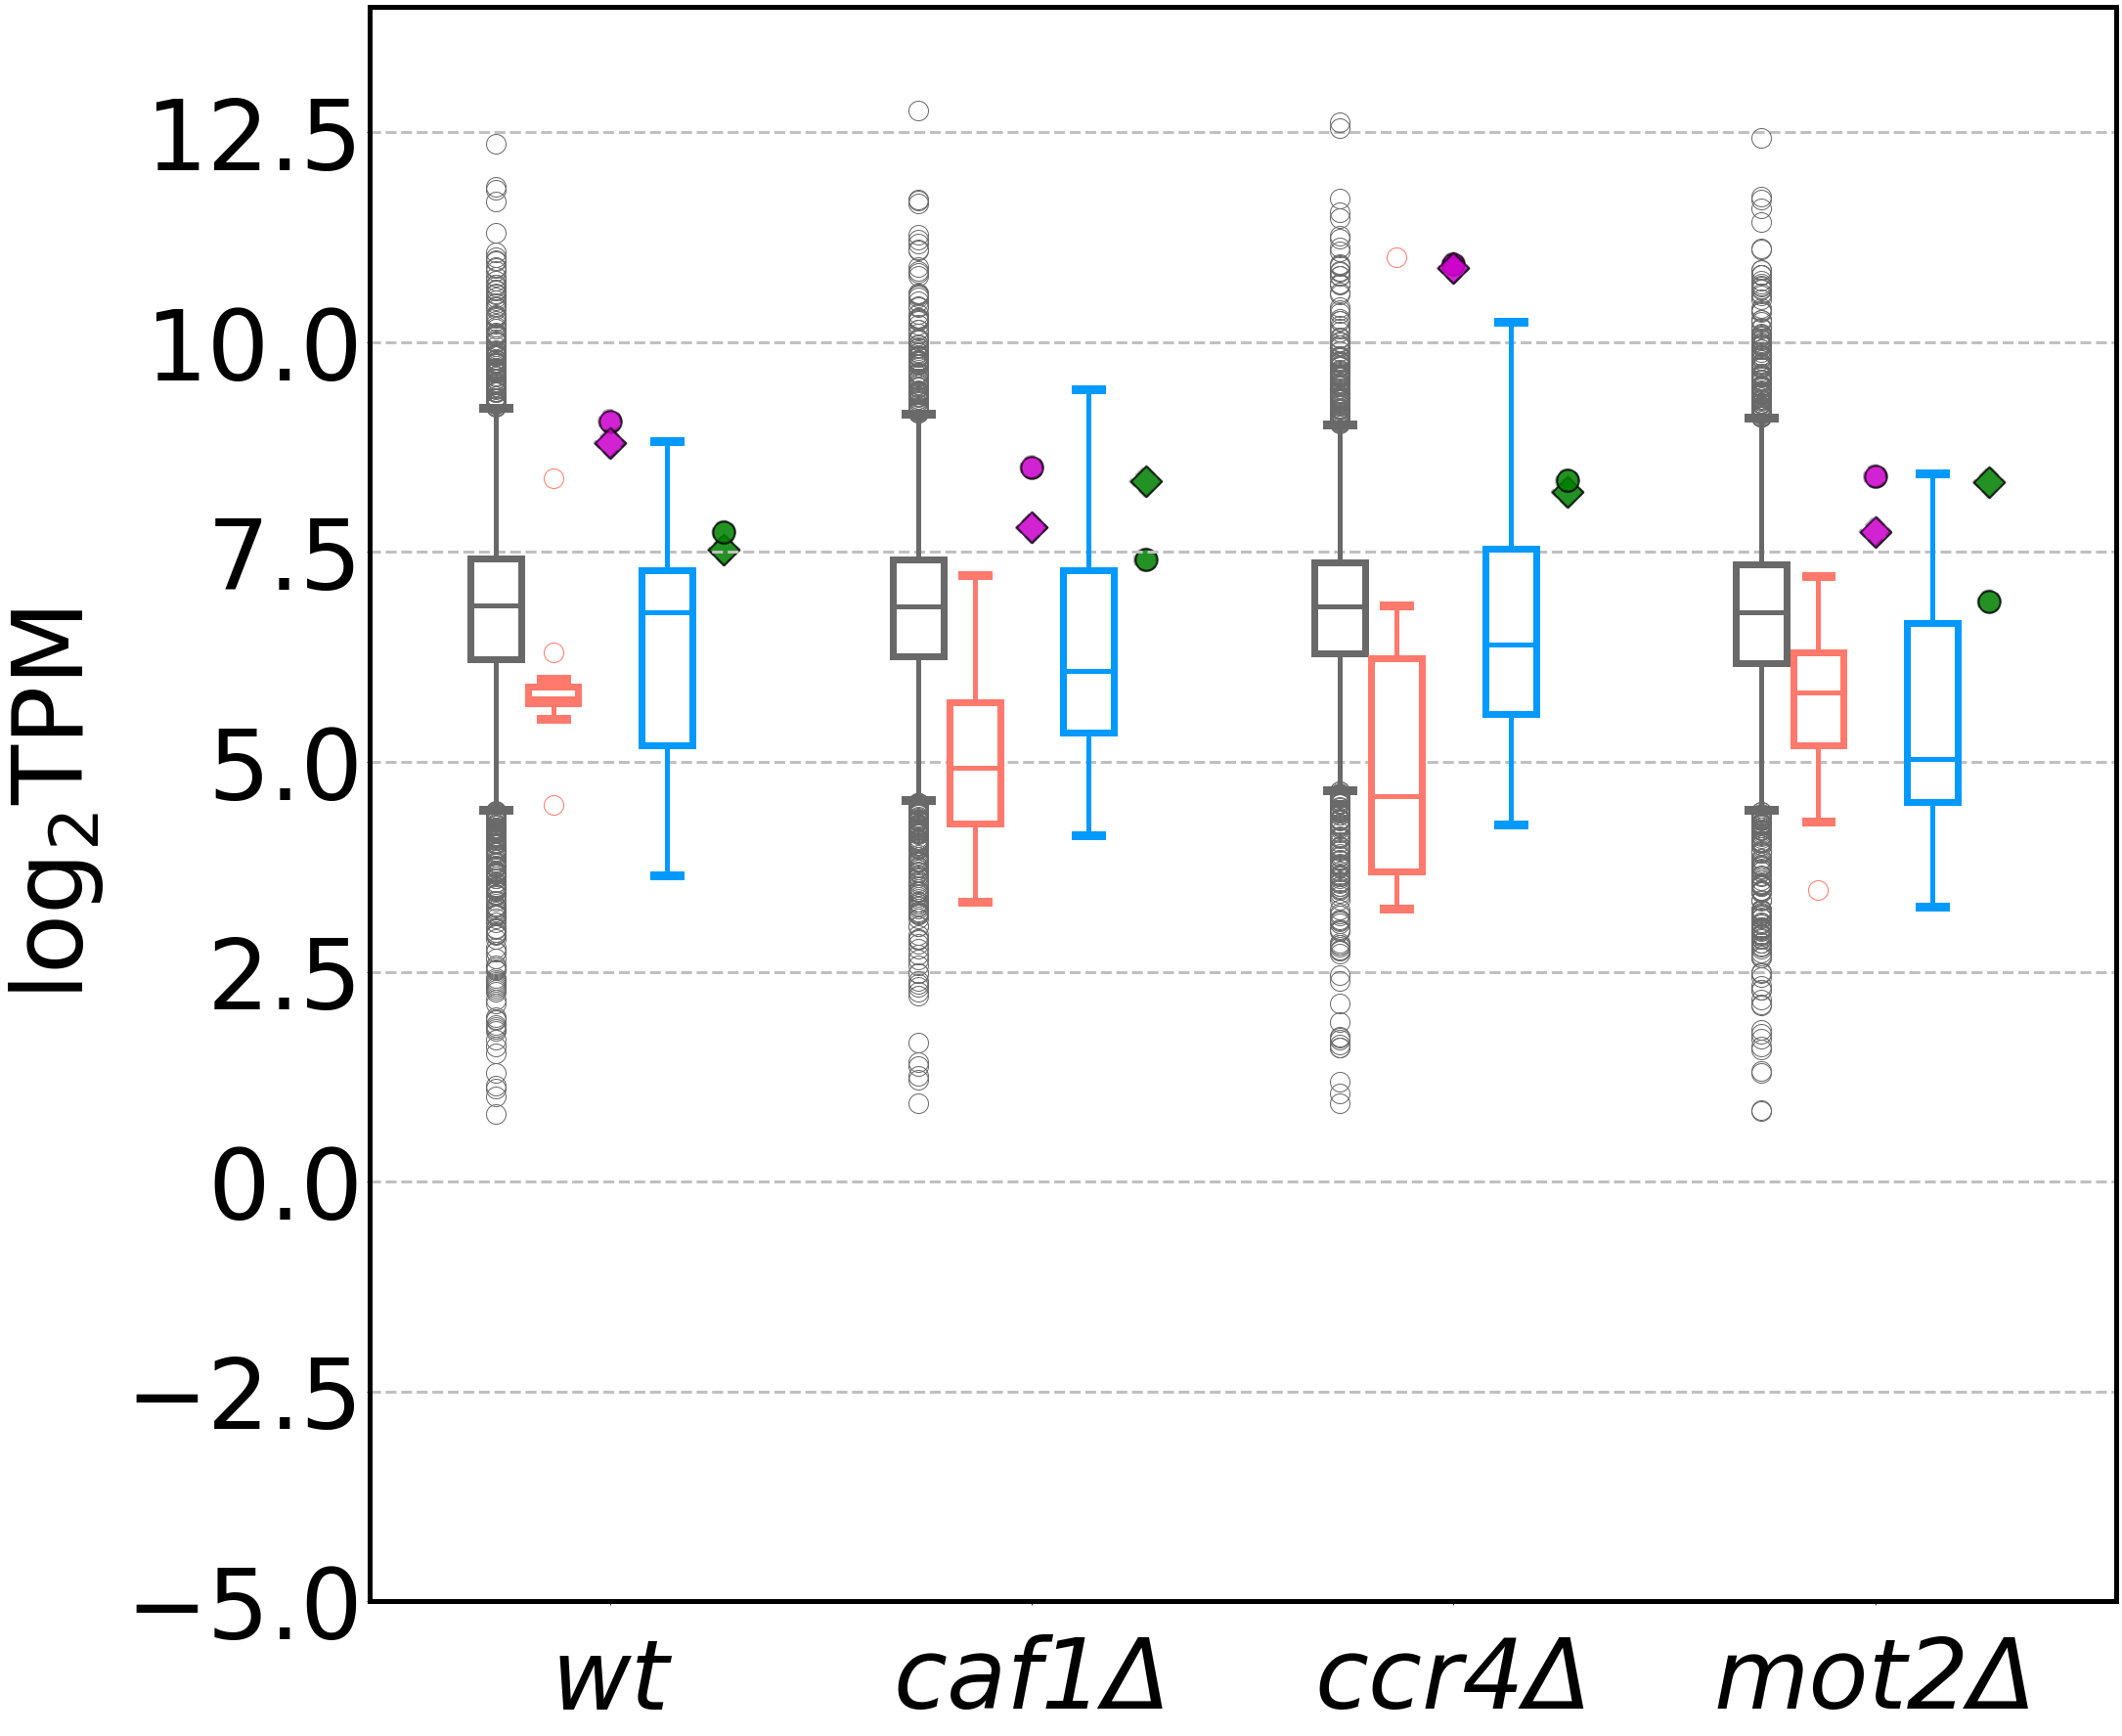

In [33]:
# data and labels
samples = [i + '_' + seq_assay for i in samples3]
#data = prepare_4cat_data(df, samples)

# path and plot
out_path = os.path.join(plots_dir, 'Figure-S3-F-extra-ccr4-not-1.png')
#out_path = os.path.join(fig_dir, 'Figure-S3-F-extra-ccr4-not-1.png')
out_path = os.path.join(fig_dir, 'Figure-S6-F-extra-ccr4-not-1.png')
print(out_path)

#multi_4cat_box_plot(data, samples,
my_multi_4cat_box_plot(
    df, samples, 
    x_labels3,
    out_path, 
    figsize=(32, 30), 
    dist=5,
    y_label='$\mathrm{log_2TPM}$',
    y_lim=(-5, 14),  
    widths=.8, 
    xlable_size=100, ylable_size=100,
    annotate=annotate_plots,
    include_mat_locus_vis = include_mat_locus_vis
)

----

## Mutant group 4 - **Figure-S3-D-extra-ccr4-not-2**

- **Supplemental Figure S3**:  
    - **(C + D)** pA RNA-seq results (steady state RNA) shown as box plot for individual mutants affecting
    - **(D)** RNA degradation. Average of at least two independent samples is shown.

In [34]:
#fig_dir = os.path.join(plots_dir, 'Figure-S3')
fig_dir = os.path.join(plots_dir, 'Figure-S6')

if not os.path.isdir(fig_dir):    
    !mkdir -p $fig_dir

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure-S6/Figure-S6-F-extra-ccr4-not-2.png


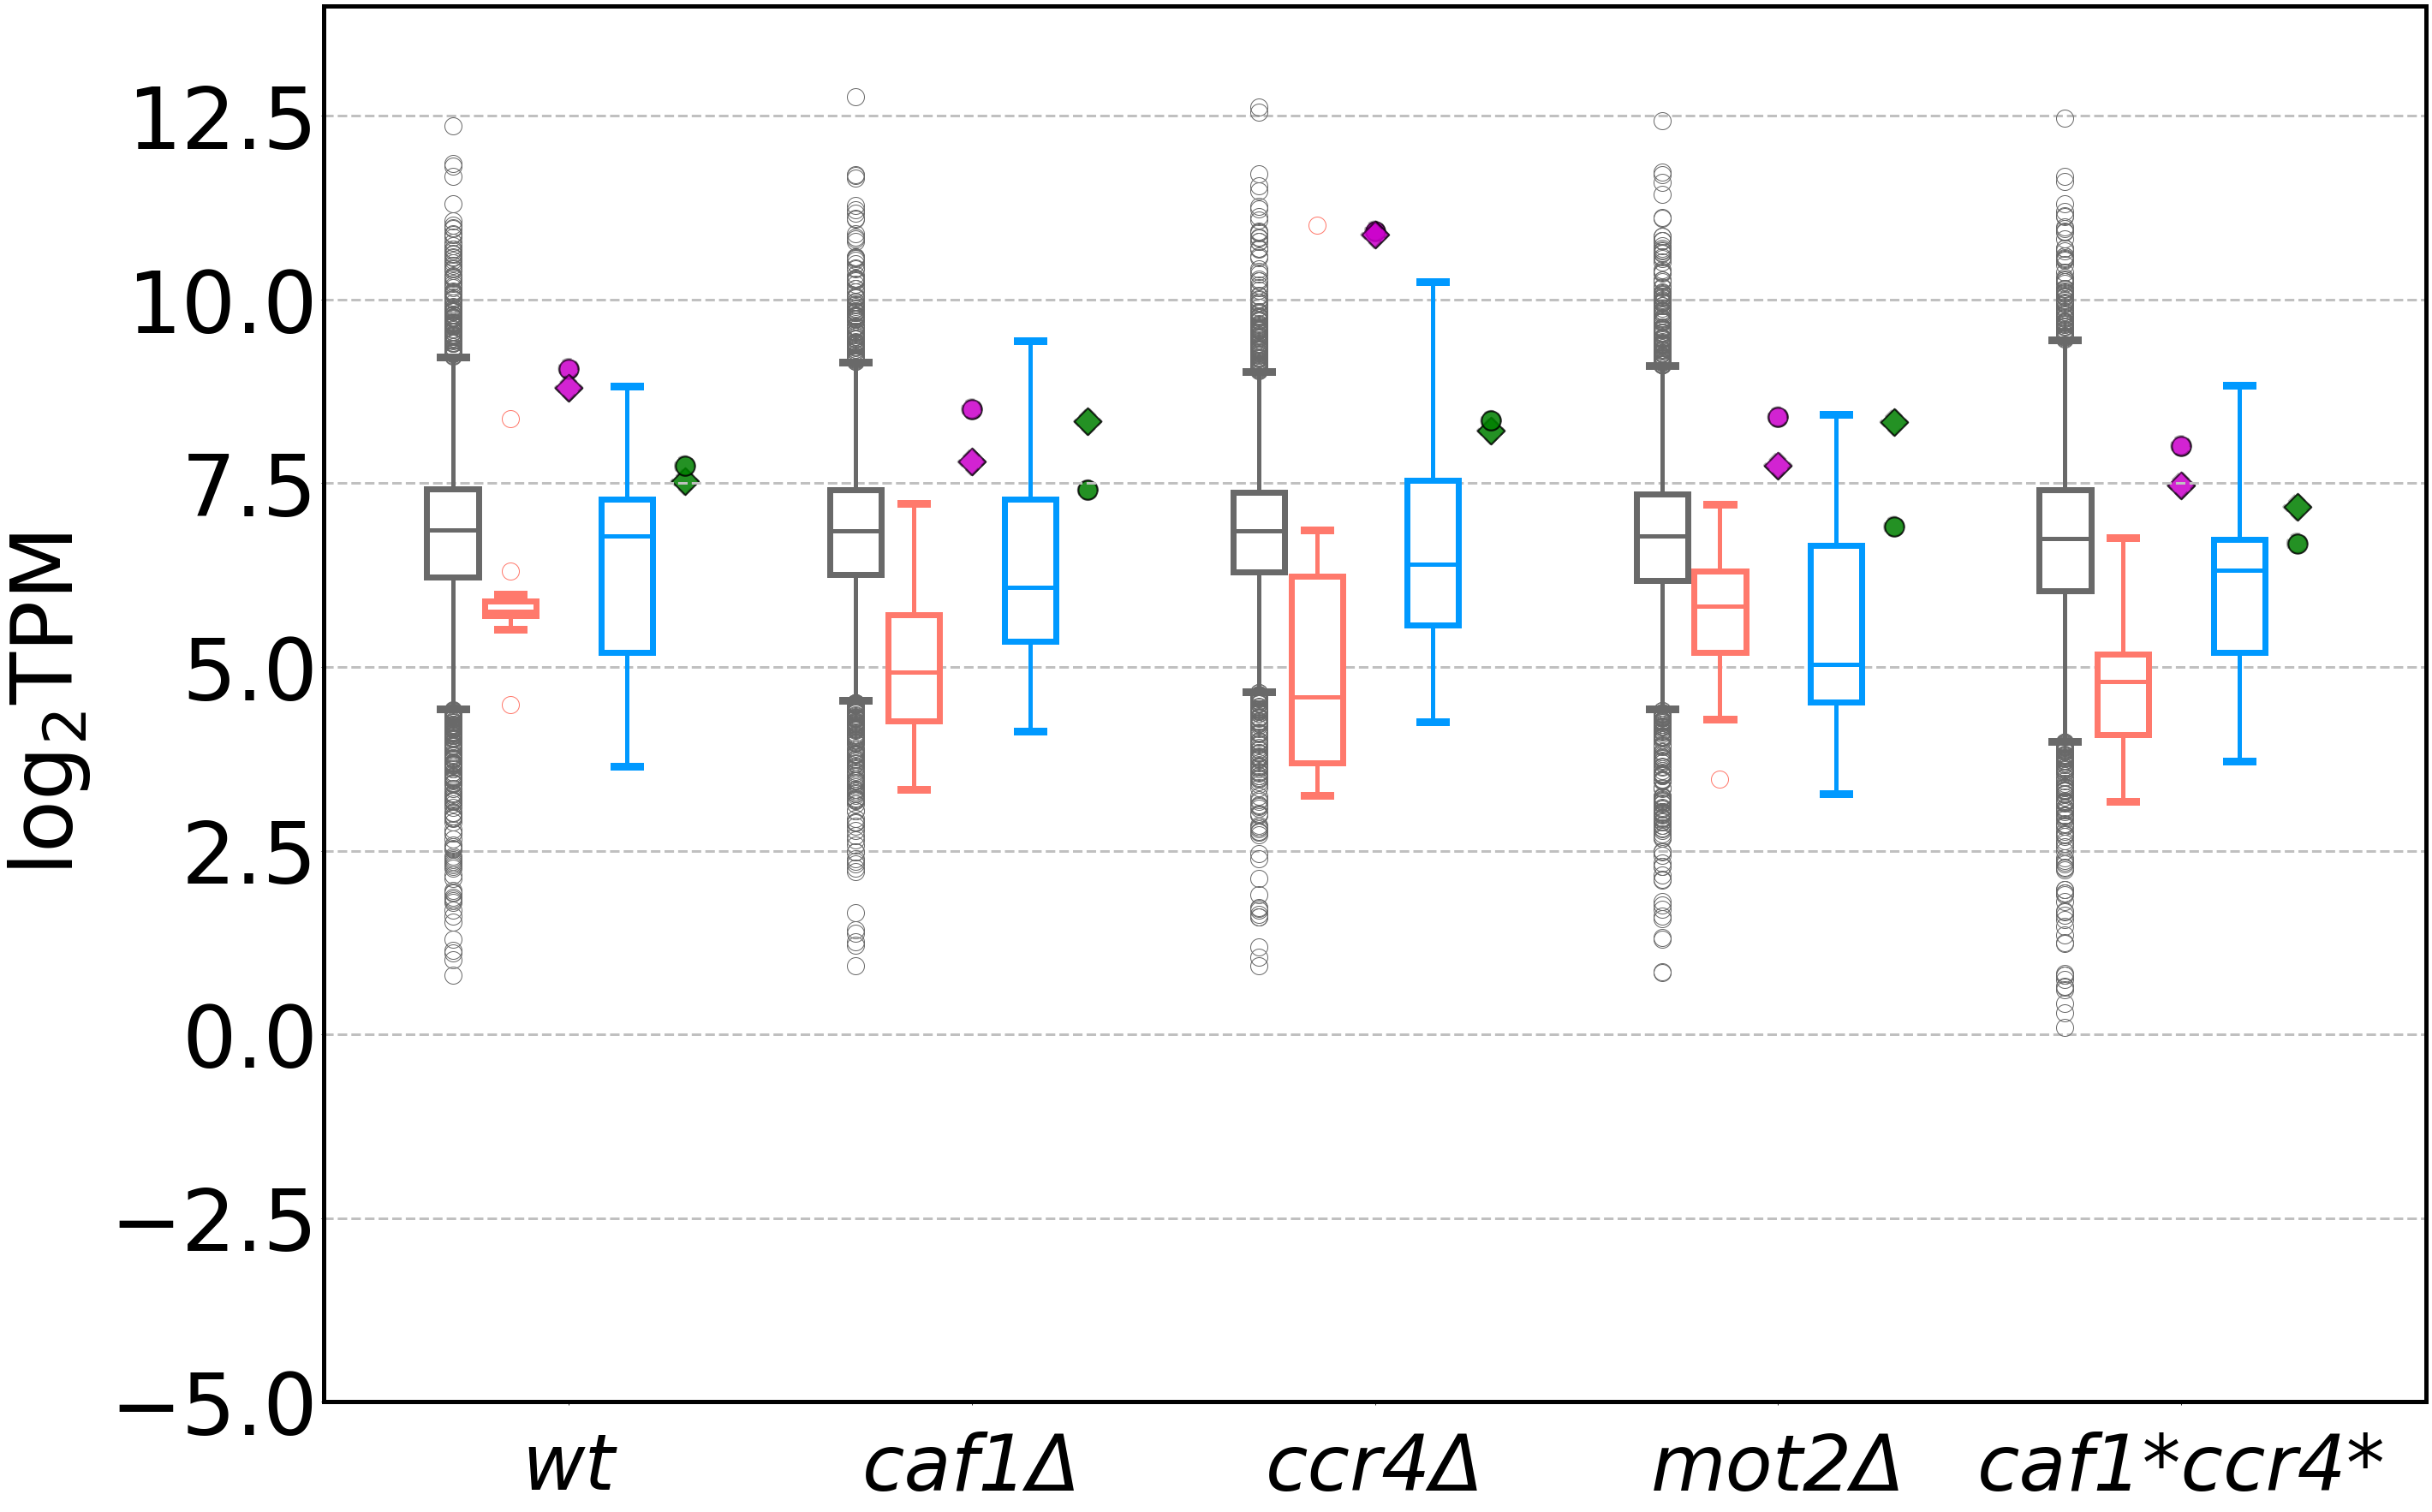

In [35]:
# data and labels
samples = [i + '_' + seq_assay for i in samples4]
#data = prepare_4cat_data(df, samples)

# path and plot
out_path = os.path.join(plots_dir, 'Figure-S3-F-extra-ccr4-not-2.png')
#out_path = os.path.join(fig_dir, 'Figure-S3-F-extra-ccr4-not-2.png')
out_path = os.path.join(fig_dir, 'Figure-S6-F-extra-ccr4-not-2.png')
print(out_path)

#multi_4cat_box_plot(data, samples,
my_multi_4cat_box_plot(
    df, samples, 
    x_labels4,
    out_path, 
    figsize=(44, 30), 
    dist=5,
    y_label='$\mathrm{log_2TPM}$',
    y_lim=(-5, 14),  
    widths=.8, 
    xlable_size=90, ylable_size=100,
    annotate=annotate_plots,
    include_mat_locus_vis = include_mat_locus_vis
)